In [1]:
import numpy as np
import pandas as pd
from metrics import *
import matplotlib.pyplot as plt

df=pd.read_csv('20230918dataset_uf.csv')
#add a ranking all m candidates has smaller rank than w's
df["ranker 11"]=np.arange(1,101,1)
#add a ranking half  m candidates on the top of ranking and another half m candidates on the bottom of rinking and w candidates on the middle  
ranker_12=np.concatenate((np.arange(1,16,1),np.arange(86,101,1),np.arange(16,86,1)), axis=None)
#print(ranker_12)
df["ranker 12"]=ranker_12
#print(df.to_string())
#df.head()


in ranker 1 the pairwise statistical parity is 0.228
in ranker 2 the pairwise statistical parity is 0.002
in ranker 3 the pairwise statistical parity is -0.106
in ranker 4 the pairwise statistical parity is -0.013
in ranker 5 the pairwise statistical parity is 0.022
in ranker 6 the pairwise statistical parity is 0.097
in ranker 7 the pairwise statistical parity is 0.195
in ranker 8 the pairwise statistical parity is -1.0
in ranker 9 the pairwise statistical parity is -1.0
in ranker 10 the pairwise statistical parity is -1.0
in ranker 11 the pairwise statistical parity is 1.0
in ranker 12 the pairwise statistical parity is 0.0


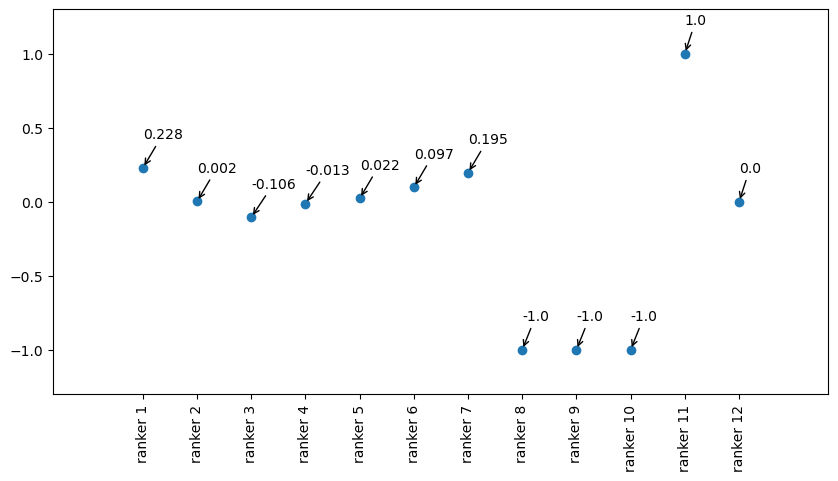

In [5]:
#pairwise_statistical_parity
psp_scores=[]
x=[]
y=[]
for ranker in df.columns[1:]:
    ranking =pd.DataFrame(columns=['id', ranker])
    ranking["id"]=np.arange(0,100,1)
    ranking[ranker]=df[ranker]
    ranking_m =ranking.head(30).to_numpy()
    ranking_w =ranking.tail(70).to_numpy()
    ranker_psp_score=pairwise_statistical_parity(ranking_m,ranking_w )
    x.append(ranker)
    y.append(ranker_psp_score)
    print("in "+ranker +" the pairwise statistical parity is "+str(round(ranker_psp_score,3)))
    psp_scores.append([ranker,ranker_psp_score])
fig = plt.figure(figsize=(10, 5))
plt.scatter(x,y)
plt.xticks(x, x, rotation ='vertical') 
plt.margins(0.15)
for psp in psp_scores:
    plt.annotate(round(psp[1],3),xy=(psp[0],psp[1]),xytext=(psp[0],psp[1]+0.2), arrowprops=dict(arrowstyle="->"))
plt.show()



In [4]:
"""
Pairwise Statistical Parity Measure: Ratio of 'a' to 'b'.
'a' represents the difference between two groups of pairs. One group includes candidates with attribute value 'm' who have a smaller rank 
than candidates with the same attribute value 'w,' while the other includes the reverse scenario.

'b' denotes the total number of pairs consisting of candidates with attribute value 'm' and candidates with attribute value 'w.' 

the ratio illustrates how favored candidates with attribute value m over candidates with attribute value w in the ranking.

if the ratio is positive showing candidates with attribute value m is favored over candidates with attribute value w in the ranking.
if the ratio is negative showing candidates with attribute value w is favored over candidates with attribute value m in the ranking.
if ratio is 0 showing 2 groups of candidates are equaled favored.
if the ratio is 1 and -1, showing one group is absolutely favored in the rank, it means all one group's candidates rank is smaller than the group's candidates rank.

in ranker 8 9 10, all the m candidates have larger rank than w's, so the  pairwise statistical parity score is -1.
in ranker 1, all the m candidate have smaller rank than  w's, so the  pairwise statistical parity score is 1.
in ranker 12, half the m candidates have smaller rank than all w candidates and half the m candidates have greater rank than all w candidates, so the  pairwise statistical parity score is 0
"""

"\nPairwise Statistical Parity Measure: Ratio of 'a' to 'b'.\n'a' represents the difference between two groups of pairs. One group includes candidates with attribute value 'm' who have a smaller rank \nthan candidates with the same attribute value 'w,' while the other includes the reverse scenario.\n\n'b' denotes the total number of pairs consisting of candidates with attribute value 'm' and candidates with attribute value 'w.' \n\nthe ratio illustrates how favored candidates with attribute value m over candidates with attribute value w in the ranking.\n\nif the ratio is positive showing candidates with attribute value m is favored over candidates with attribute value w in the ranking.\nif the ratio is negative showing canditates with attribute value w is favored over candidates with attribute value m in the ranking.\nif ratio is 0 showing 2 groups of candidates are equaled favored.\nif the ratio is 1 and -1, showing one group is absolutely favored in the rank, it means all one group's

In [9]:
#top_k_parity
satisfied_array_1=[]
satisfied_array_2=[]
satisfied_array_3=[]
satisfied_array_4=[]
satisfied_array_5=[]
for ranker in df.columns[1:]:
    ranking =pd.DataFrame(columns=['id', ranker])
    ranking["id"]=np.arange(0,100,1)
    ranking[ranker]=df[ranker]
    ranking_m =ranking.head(30).to_numpy()
    ranking_w =ranking.tail(70).to_numpy()
    rankings=np.array([ranking_m,ranking_w], dtype=object)
    satisfied_1=top_k_parity(rankings,9 )
    satisfied_2=top_k_parity(rankings,10 )
    satisfied_3=top_k_parity(rankings,99 )
    satisfied_4=top_k_parity(rankings,100 )
    satisfied_5=top_k_parity(rankings,1 )
    satisfied_array_1.append([ranker,satisfied_1])
    satisfied_array_2.append([ranker,satisfied_2])
    satisfied_array_3.append([ranker,satisfied_3])
    satisfied_array_4.append([ranker,satisfied_4])
    satisfied_array_5.append([ranker,satisfied_5])

satisfied_ranker=[]
for satisfied in satisfied_array_1:
    if satisfied[1]:
        satisfied_ranker.append(satisfied[0])
if len(satisfied_ranker)>0:
    rankers=""
    for ranker in satisfied_ranker:
        if rankers=="":
            rankers=rankers + ranker
        else:
            rankers=rankers + ", "+ranker
    print(rankers + " satisfied top-9-parity")
else:
    print("none of rankers satisfied top-10-parity  ")

satisfied_ranker=[]
for satisfied in satisfied_array_2:
    if satisfied[1]:
        satisfied_ranker.append(satisfied[0])
if len(satisfied_ranker)>0:
    rankers=""
    for ranker in satisfied_ranker:
        if rankers=="":
            rankers=rankers + ranker
        else:
            rankers=rankers + ", "+ranker
    print(rankers + " satisfied top-10-parity")
else:
    print("none of rankers satisfied top-10-parity  ")

satisfied_ranker=[]
for satisfied in satisfied_array_3:
    if satisfied[1]:
        satisfied_ranker.append(satisfied[0])
if len(satisfied_ranker)>0:
    rankers=""
    for ranker in satisfied_ranker:
        if rankers=="":
            rankers=rankers + ranker
        else:
            rankers=rankers + ", "+ranker
    print(rankers + " satisfied top-99-parity")
else:
    print("none of rankers satisfied top-99-parity  ")

satisfied_ranker=[]
for satisfied in satisfied_array_4:
    if satisfied[1]:
        satisfied_ranker.append(satisfied[0])
if len(satisfied_ranker)>0:
    rankers=""
    for ranker in satisfied_ranker:
        if rankers=="":
            rankers=rankers + ranker
        else:
            rankers=rankers + ", "+ranker
    print(rankers + " satisfied top-100-parity")
else:
    print("none of rankers satisfied top-100-parity  ")

satisfied_ranker=[]
for satisfied in satisfied_array_5:
    if satisfied[1]:
        satisfied_ranker.append(satisfied[0])
if len(satisfied_ranker)>0:
    rankers=""
    for ranker in satisfied_ranker:
        if rankers=="":
            rankers=rankers + ranker
        else:
            rankers=rankers + ", "+ranker
    print(rankers + " satisfied top-1-parity")
else:
    print("none of rankers satisfied top-1-parity  ")

ranker 6 satisfied top-9-parity
ranker 1, ranker 3 satisfied top-10-parity
ranker 1, ranker 2, ranker 3, ranker 7, ranker 11 satisfied top-99-parity
ranker 1, ranker 2, ranker 3, ranker 4, ranker 5, ranker 6, ranker 7, ranker 8, ranker 9, ranker 10, ranker 11, ranker 12 satisfied top-100-parity
ranker 1, ranker 2, ranker 3, ranker 5, ranker 7, ranker 8, ranker 9, ranker 10 satisfied top-1-parity


In [ ]:
"""
   Top-K Parity Measure: Assessing Whether the Number of Candidates with a Special Attribute and a Rank Smaller than or Equal to 'k' 
   is Proportional to the Total Number of Candidates with that Special Attribute.
   
   top-9-parity:  9*0.3=2.7≈3 members of m candidates should  have rank smaller than 9     candidate 8 with rank 3  candidate 10 with 1   candidate12 with 6
                  9*0.7=6.3≈6 members of w candidates should  have rank smaller than 9     candidate 39 44 53 58 84 90
                                                                                           rank      9  2  5  7  8  4
                  
""" 

In [6]:
#rank_equality_error
group_1= np.arange(0,30,1)  
group_2= np.arange(30,100,1) 
ree_scores=[]
for ranker_1 in range(0 , len(df.columns[1:])):
    for ranker_2 in range(ranker_1+1,len(df.columns[1:])):
        ranker_1_name=df.columns[ranker_1+1]
        ranking_1=pd.DataFrame(columns=['id', ranker_1_name])
        ranking_1["id"]=np.arange(0,100,1)
        ranking_1[ranker_1_name]=df[ranker_1_name]
        ranker_2_name=df.columns[ranker_2+1]
        ranking_2=pd.DataFrame(columns=['id', ranker_2_name])
        ranking_2["id"]=np.arange(0,100,1)
        ranking_2[ranker_2_name]=df[ranker_2_name]
        ree=rank_equality_error(ranking_1.to_numpy(),ranking_2.to_numpy(),group_1,group_2)
        ree_scores.append(ree)
        print("the rank equality error for group m in " + ranker_1_name +", " + ranker_2_name +" is " + str(round(ree,3)) )     

the rank equality error for group m in ranker 1, ranker 2 is 0.485
the rank equality error for group m in ranker 1, ranker 3 is 0.562
the rank equality error for group m in ranker 1, ranker 4 is 0.449
the rank equality error for group m in ranker 1, ranker 5 is 0.571
the rank equality error for group m in ranker 1, ranker 6 is 0.438
the rank equality error for group m in ranker 1, ranker 7 is 0.47
the rank equality error for group m in ranker 1, ranker 8 is 0.614
the rank equality error for group m in ranker 1, ranker 9 is 0.614
the rank equality error for group m in ranker 1, ranker 10 is 0.614
the rank equality error for group m in ranker 1, ranker 11 is 0.386
the rank equality error for group m in ranker 1, ranker 12 is 0.5
the rank equality error for group m in ranker 2, ranker 3 is 0.484
the rank equality error for group m in ranker 2, ranker 4 is 0.535
the rank equality error for group m in ranker 2, ranker 5 is 0.498
the rank equality error for group m in ranker 2, ranker 6 is 0

In [7]:
"""
rank_equality_error measure  the ratio a to b

a represents the number of pairs of candidates where one candidate with attribute 'm' has a smaller rank 
than a candidate with attribute 'w' in one ranking, 
while the rank of candidate 'm' is greater than the rank of candidate 'w' in another ranking. '

b represents the number of total pairs

The ratio represents the percentage of pairs that display varying preferences between the two rankings.

ranker 8,9 and 10 have same ranking so the rank_equality_error of (8,9)(8,10)(9,10)is 0.

rankers 8 9 10, all candidates with attribute 'm' have higher ranks than candidates with attribute 'w.' Conversely, in Ranker 11, the situation is reversed.
Therefore, the rank equality error for the pairs (8, 11), (9, 11), and (10, 11) is 1. 

ranker 8 9 10 11 have 100 percent favoring one group of candidates over another one. 
ranker 12 favors half of the candidates with attribute 'm' over all of the candidates with attribute 'w' and 
favors all the candidates with 'w' over the other half of the candidates with attribute 'm'. 
the rank equality error for the pairs (8, 12), (9, 12), (10, 12), and(11,12)is 0.5 
"""

"\nrank_equality_error measure  the ratio a to b\n\na represents the number of pairs of candidates where one candidate with attribute 'm' has a smaller rank \nthan a candidate with attribute 'w' in one ranking, \nwhile the rank of candidate 'm' is greater than the rank of candidate 'w' in another ranking. '\n\nb represents the number of total pairs\n\nThe ratio represents the percentage of pairs that display varying preferences between the two rankings.\n\nranker 8,9 and 10 have same ranking so the rank_equality_error of (8,9)(8,10)(9,10)is 0.\n\nrankers 8 9 10, all candidates with attribute 'm' have higher ranks than candidates with attribute 'w.' Conversely, in Ranker 11, the situation is reversed.\nTherefore, the rank equality error for the pairs (8, 11), (9, 11), and (10, 11) is 1. \n\nranker 8 9 10 11 have 100 percent favoring one group of candidates over another one. \nranker 12 favors half of the candidates with attribute 'm' over all of the candidates with attribute 'w' and \nf

In [2]:
#attribute_rank_parity
arps=[]
attributes=pd.DataFrame(columns=['id', 'attr'])
attributes["id"]=np.arange(0,100,1)
attributes["attr"]=np.append(np.repeat("m",30),np.repeat("w",70))
for ranker in df.columns[1:]:
    ranking =pd.DataFrame(columns=['id', ranker])
    ranking["id"]=np.arange(0,100,1)
    ranking[ranker]=df[ranker]
    ranking=ranking.to_numpy()
    arp=attribute_rank_parity(ranking,attributes.to_numpy(),0) 
    max_value=""
    min_value=""
    if arp[0].size>1 :
        for i in arp[0]:
            max_value=max_value +" "+ i.tolist()[0]
    else:
        max_value=arp[0][0].tolist()[0]
    if arp[1].size>1 :
        for i in arp[0]:
            min_value=min_value +" "+ i.tolist()[0] 
    else:
        min_value=arp[1].tolist()[0][0]
    print("in "+ ranker +"the value with maximum Favored Pair Representation is " + max_value+ ", minimum is " + min_value + ", and the attribute rank parity score is " + np.array2string(arp[2], precision=3,separator=' '))
    arps.append(arp)


in ranker 1the value with maximum Favored Pair Representation is m, minimun is w, and the attribute rank parity score is 0.228
in ranker 2the value with maximum Favored Pair Representation is m, minimun is w, and the attribute rank parity score is 0.002
in ranker 3the value with maximum Favored Pair Representation is w, minimun is m, and the attribute rank parity score is 0.106
in ranker 4the value with maximum Favored Pair Representation is w, minimun is m, and the attribute rank parity score is 0.013
in ranker 5the value with maximum Favored Pair Representation is m, minimun is w, and the attribute rank parity score is 0.022
in ranker 6the value with maximum Favored Pair Representation is m, minimun is w, and the attribute rank parity score is 0.097
in ranker 7the value with maximum Favored Pair Representation is m, minimun is w, and the attribute rank parity score is 0.195
in ranker 8the value with maximum Favored Pair Representation is w, minimun is m, and the attribute rank parity

In [9]:
"""
Favored Pair Representation Measure: The Ratio of 'a' to 'b.' 
'a' represents the number of pairs where the ranks of candidates with attribute 'm' are smaller than those of candidates with attribute 'w.' 
'b' represents the total number of pairs that include one candidate with attribute 'm' and another with attribute 'w.'
The ratio indicates the extent to which candidates with attribute 'm' are favored in the ranking.

Attribute Rank Parity calculates the maximum difference in Favored Pair Representation for candidates with different attribute values, considering a fixed attribute,
and also the value with maximum Favored Pair Representation score and the value with minimum Favored Pair Representation score.

In Rankers 8 9 10 11, there is a 100 percent preference for one group of candidates with a particular attribute value. 
As a result, the Attribute Rank Parity score is 1. However, in Ranker 8, 9, and 10, the maximum is 'w', whereas in Ranker 11, the maximum is 'm'.

In Ranker 12, half of the candidates with attribute 'm' are favored over all candidates with attribute 'w,' and, 
conversely, all candidates with 'w' are favored over the other half of the candidates with attribute 'm.' 
Consequently, the Favored Pair Representation score for both groups is the same, resulting in an Attribute Rank Parity score of 0..
"""

"\nFavored Pair Representation Measure: The Ratio of 'a' to 'b.' \n'a' represents the number of pairs where the ranks of candidates with attribute 'm' are smaller than those of candidates with attribute 'w.' \n'b' represents the total number of pairs that include one candidate with attribute 'm' and another with attribute 'w.'\nThe ratio indicates the extent to which candidates with attribute 'm' are favored in the ranking.\n\nAttribute Rank Parity calculates the maximum difference in Favored Pair Representation for candidates with different attribute values, considering a fixed attribute,\nand also the value with maximum Favored Pair Representation score and the value with minimunFavored Pair Representation score.\n\nIn Rankers 8 9 10 11, there is a 100 percent preference for one group of candidates with a particular attribute value. \nAs a result, the Attribute Rank Parity score is 1. However, in Ranker 8, 9, and 10, the maximum is 'w', whereas in Ranker 11, the maximum is 'm'.\n\nIn

In [10]:

"""

In conclusion, 

Pairwise Statistic Parity measures the fairness of rankings by assessing the degree to which one specific group of candidates, 
defined by a binary attribute, is favored.

Top-K Parity measures the fairness of rankings within the top K positions for all groups of candidates defined by a specific attribute.

Rank Equality Error measures the differing preferences between two groups of candidates in two rankings.

the result of attribute rank parity and pairwise statistic parity are equal. 
the favored extent is same. 
Through the value with the maximum Favored Pair Representation, we can determine which group of candidates is favored in Attribute Rank Parity.           
Through positivity, we can discern which group of candidates is favored in Pairwise Statistic Parity.. 
Pairwise Statistic Parity and Attribute Rank Parity measure fairness in the same way when the attribute has a binary value. 
However, when the attribute has multiple values, Attribute Rank Parity can still assess the fairness of the ranking for that attribute.
"""


'\n\nIn conclusion, \n\nPairwise Statistic Parity measures the fairness of rankings by assessing the degree to which one specific group of candidates, \ndefined by a binary attribute, is favored.\n\nTop-K Parity measures the fairness of rankings within the top K positions for all groups of candidates defined by a specific attribute.\n\nRank Equality Error measures the differing preferences between two groups of candidates in two rankings.\n\nthe result of attribute rank parity and pairwise statistic parity are equal. \nthe favored extent is same. \nThrough the value with the maximum Favored Pair Representation, we can determine which group of candidates is favored in Attribute Rank Parity.           \nThrough positivity, we can discern which group of candidates is favored in Pairwise Statistic Parity.. \nPairwise Statistic Parity and Attribute Rank Parity measure fairness in the same way when the attribute has a binary value. \nHowever, when the attribute has multiple values, Attribute

In [3]:
np.__version__

'1.24.3'